In [2]:
import pandas as pd

## 1. 상관분석 (Correlation Analysis)

In [11]:
# 상관분석 위한 임의의 데이터셋 생성
import pandas as pd
import numpy as np

# 임의의 데이터셋 생성
np.random.seed(0)  # 재현 가능성을 위해 시드 설정

# 임의의 특성 생성
num_samples = 1000
feature1 = np.random.normal(loc=0, scale=1, size=num_samples)
feature2 = np.random.normal(loc=0, scale=1, size=num_samples)

# 임의의 상관관계 추가
# 여기서는 feature2가 feature1에 선형적으로 의존하도록 설정합니다.
# 이 예시에서는 단순한 선형 관계를 나타내기 위해 상수 0.5를 사용합니다.
feature2 = feature1 * 0.5 + np.random.normal(loc=0, scale=0.1, size=num_samples)

# 데이터프레임 생성
data = pd.DataFrame({'Feature1': feature1, 'Feature2': feature2})

# 데이터셋 확인
print(data.head())

   Feature1  Feature2
0  1.764052  0.728734
1  0.400157  0.028882
2  0.978738  0.493982
3  2.240893  1.024609
4  1.867558  0.925698


In [14]:
# 공분산 구하기
covariance = data['Feature1'].cov(data['Feature2'])
print('Feature1, Feature2 공분산:', covariance)

Feature1, Feature2 공분산: 0.4840522514521764


In [15]:
# 피어슨 상관계수와 p값
from scipy.stats import pearsonr
pearson_corr, p_value = pearsonr(data['Feature1'], data['Feature2'])
print('Feature1, Feature2의 피어슨 상관계수:', f"{pearson_corr:.10f}")

alpha = 0.05

if p_value < alpha:
    print("귀무가설 기각. 통계적으로 유의미한 연관성이 있음.")
else:
    print("귀무가설 기각할 수 없음. 통계적으로 유의미한 연관성이 없음.")

Feature1, Feature2의 피어슨 상관계수: 0.9815847805
귀무가설 기각. 통계적으로 유의미한 연관성이 있음.


## 2. 선형회귀 (Linear Regression)

#### 1) 단순선형회귀(Simple Linear Regression)

In [3]:
ice = pd.read_csv(r"C:\Users\hana9\OneDrive\바탕 화면\빅데이터_7\archive\Ice Cream Sales - temperatures.csv")
ice.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [4]:
ice.dtypes

Temperature            int64
Ice Cream Profits    float64
dtype: object

Text(0, 0.5, 'Ice Cream Profits')

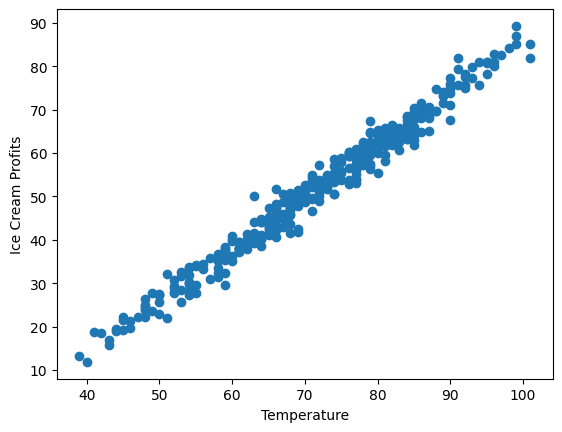

In [5]:
import matplotlib.pyplot as plt
plt.scatter(ice["Temperature"], ice["Ice Cream Profits"])
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")

In [7]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 독립변수 X, 종속변수 Y
X = ice['Temperature']
Y = ice['Ice Cream Profits']

# 상수항 추가
X = sm.add_constant(X)

# OLS model에 fit
model = sm.OLS(Y,X).fit()

# 예측
y_pred = model.predict(X)

# R-squared 계산
r_squared = model.rsquared

# 모델 요약
summary = model.summary()

print("R-squared:", r_squared)
print(summary)

R-squared: 0.9770249461722685
                            OLS Regression Results                            
Dep. Variable:      Ice Cream Profits   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Wed, 15 May 2024   Prob (F-statistic):          1.57e-299
Time:                        22:47:45   Log-Likelihood:                -840.52
No. Observations:                 365   AIC:                             1685.
Df Residuals:                     363   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.69

#### 다른 방법 사용-LinearRegression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X와 y 데이터 설정
X = ice.iloc[:, 0:1]  # 독립 변수로는 첫 번째 열을 사용합니다.
y = ice.iloc[:, -1]   # 종속 변수로는 마지막 열을 사용합니다.

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# train_test_split 함수는 데이터를 주어진 비율에 따라 훈련 세트와 테스트 세트로 나눕니다.
# test_size=0.2는 테스트 세트의 비율을 나타냅니다. 여기서는 20%를 테스트 세트로 사용합니다.
# random_state는 데이터를 분할할 때 셔플링을 위한 시드 값입니다. 동일한 시드를 사용하면 결과가 항상 같게 됩니다.

# 선형 회귀 모델 생성 및 훈련
lr = LinearRegression()  # 선형 회귀 모델 객체를 생성합니다.
lr.fit(X_train, y_train)  # 훈련 세트를 사용하여 모델을 훈련합니다.

# 테스트 데이터의 첫 번째 샘플을 이용하여 예측
prediction = lr.predict(X_test.iloc[0].values.reshape(1,1))
# predict 메서드를 사용하여 테스트 세트의 첫 번째 샘플에 대한 예측을 수행합니다.
# 여기서 X_test.iloc[0].values.reshape(1,1)는 예측할 데이터를 모델에 전달하기 위해 형태를 변환해주는 과정입니다.
# X_test.iloc[0]은 첫 번째 샘플을 의미하며, .values는 해당 샘플의 값을 추출합니다.
# reshape(1,1)은 해당 값을 모델에 전달하기 위해 2차원 배열로 변환합니다.

# 예측 결과 출력
print(prediction)


[36.54243613]


C:\Users\hana9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Ice Cream Profits')

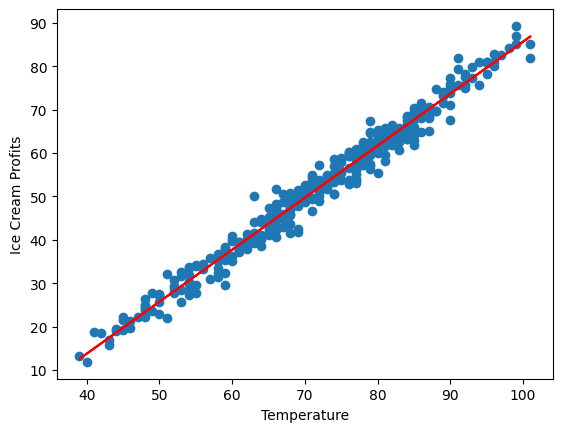

In [9]:
plt.scatter(ice["Temperature"], ice["Ice Cream Profits"])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")

#### 2) 다중선형회귀(Multiple Linear Regression)

In [16]:
startup = pd.read_csv(r"C:\Users\hana9\OneDrive\바탕 화면\빅데이터_7\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# 독립 변수(X), 종속 변수(Y)
X=startup[['R&D Spend', 'Administration', 'Marketing Spend']]
Y=startup['Profit']

# 스케일링 이전의 원래 열 이름 가져오기
original_column_names = list(X.columns)
original_column_names.insert(0, 'const') 

# 특성을 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 입력에 상수항 추가
X_scaled = sm.add_constant(X_scaled)
# OLS model에 핏
model = sm.OLS(Y, X_scaled).fit()

# R-squared 계산
r_squared = model.rsquared

# Summary
summary = model.summary(xname=original_column_names)

print("R-squared:", r_squared)
print(summary)

R-squared: 0.9507459940683246
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 15 May 2024   Prob (F-statistic):           4.53e-30
Time:                        23:10:46   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

#### 다른 방법 사용-Multiple Linear Regression

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 독립 변수와 종속 변수 설정
X = startup[['R&D Spend', 'Administration', 'Marketing Spend']]  # 독립 변수
y = startup['Profit']  # 종속 변수

# 더미 변수 생성 (카테고리형 변수 State를 더미 변수로 변환)
X = pd.get_dummies(X, drop_first=True)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 80926321.2229516


#### 3) 로지스틱 회귀(Logistic Regression)

In [43]:
cancer = pd.read_csv(r"C:\Users\hana9\OneDrive\바탕 화면\빅데이터_7\breast_cancer.csv")
cancer

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [44]:
cancer['Class'].unique()

array([2, 4], dtype=int64)

In [45]:
# 2,4를 0,1로 변경
cancer['Class'] = cancer['Class'].replace({2: 0, 4: 1})

In [46]:
cancer['Class'].unique()

array([0, 1], dtype=int64)

In [47]:
cancer.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [48]:
cancer.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [49]:
print(cancer.columns)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 독립 변수와 종속 변수 설정
X = cancer[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
          'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
y = cancer['Class']  # 종속 변수

original_column_names=list(X.columns)
original_column_names.insert(0, 'const')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)
logit_model = sm.Logit(y, X_scaled)
result = logit_model.fit()

summary = result.summary(xname = original_column_names)
print(summary)
print(summary.tables)

Optimization terminated successfully.
         Current function value: 0.075321
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  683
Model:                          Logit   Df Residuals:                      673
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.8837
Time:                        23:27:25   Log-Likelihood:                -51.444
converged:                       True   LL-Null:                       -442.18
Covariance Type:            nonrobust   LLR p-value:                2.077e-162
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0941      0.323     -3.384      0.001  

#### 다른 방법-로지스틱 회귀

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 독립 변수와 종속 변수 설정
X = cancer[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
          'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']]
y = cancer['Class']  # 종속 변수

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9562043795620438
